In [1]:
from spacerocks.observing import DetectionCatalog, Observatory
from spacerocks.time import Time
from spacerocks.spacerock import SpaceRock, Origin

from spacerocks.spice import SpiceKernel
kernel = SpiceKernel()
kernel.load("/Users/kjnapier/data/spice/latest_leapseconds.tls")
kernel.load("/Users/kjnapier/data/spice/de440s.bsp")

import numpy as np

origin = Origin.ssb()


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
epoch = Time.now()
w84 = Observatory.from_obscode('w84')
rock = SpaceRock.from_horizons("Arrokoth", epoch, frame="J2000", origin=origin)

In [7]:
detections = DetectionCatalog()
for idx in range(0, 600, 5):
    rock.analytic_propagate(epoch + idx)
    observer = w84.at(epoch + idx, origin)
    obs = rock.observe(observer)
    detections.add(obs)

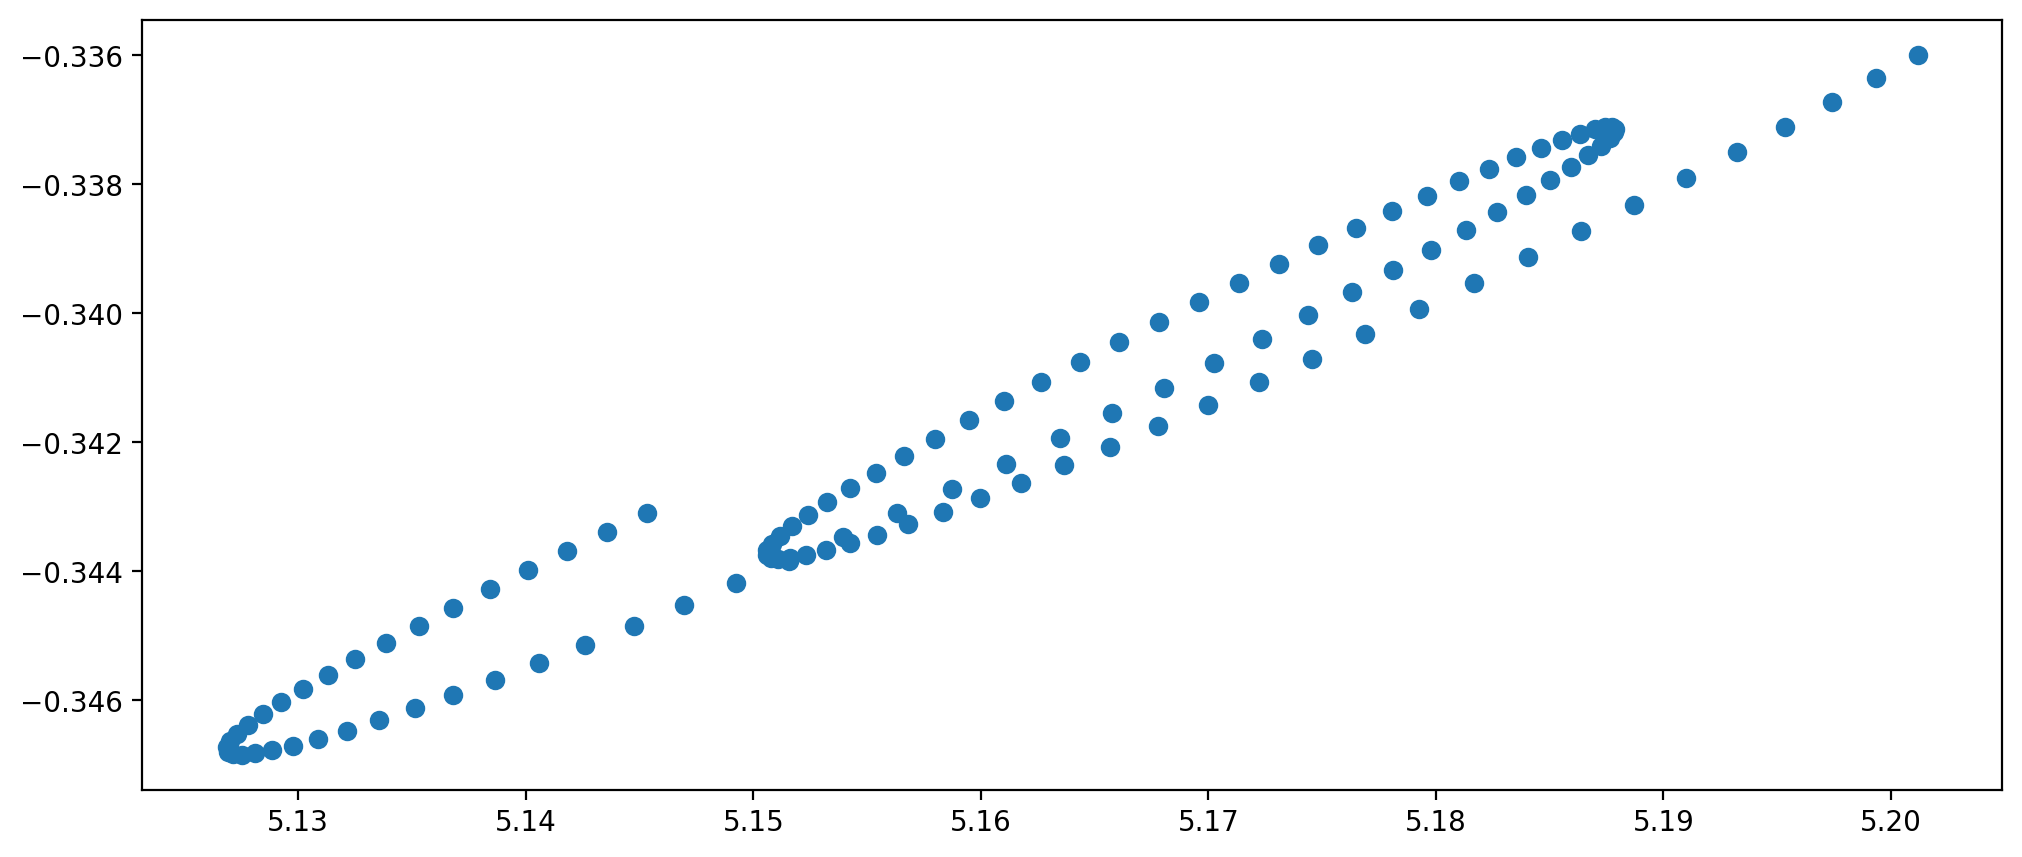

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.scatter(detections.ra, detections.dec)